In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
print(df.shape)

(150, 5)


In [6]:
for col in df.columns:
    print(col)

sepal_length
sepal_width
petal_length
petal_width
species


In [9]:
df['species'].value_counts() #Balanced DataSet

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

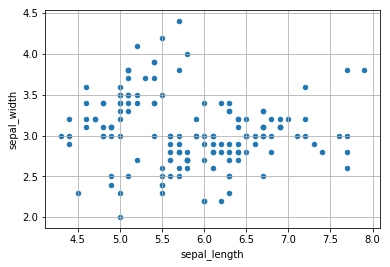

In [13]:
df.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.grid()
plt.show()

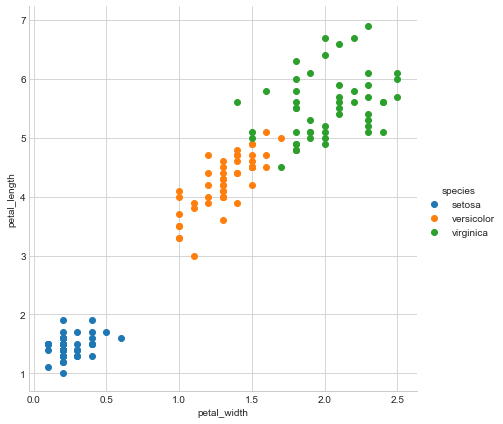

In [31]:
sns.set_style('whitegrid')

sns.FacetGrid(df, hue='species', size=6)\
.map(plt.scatter, 'petal_width', 'petal_length')\
.add_legend()

plt.show()

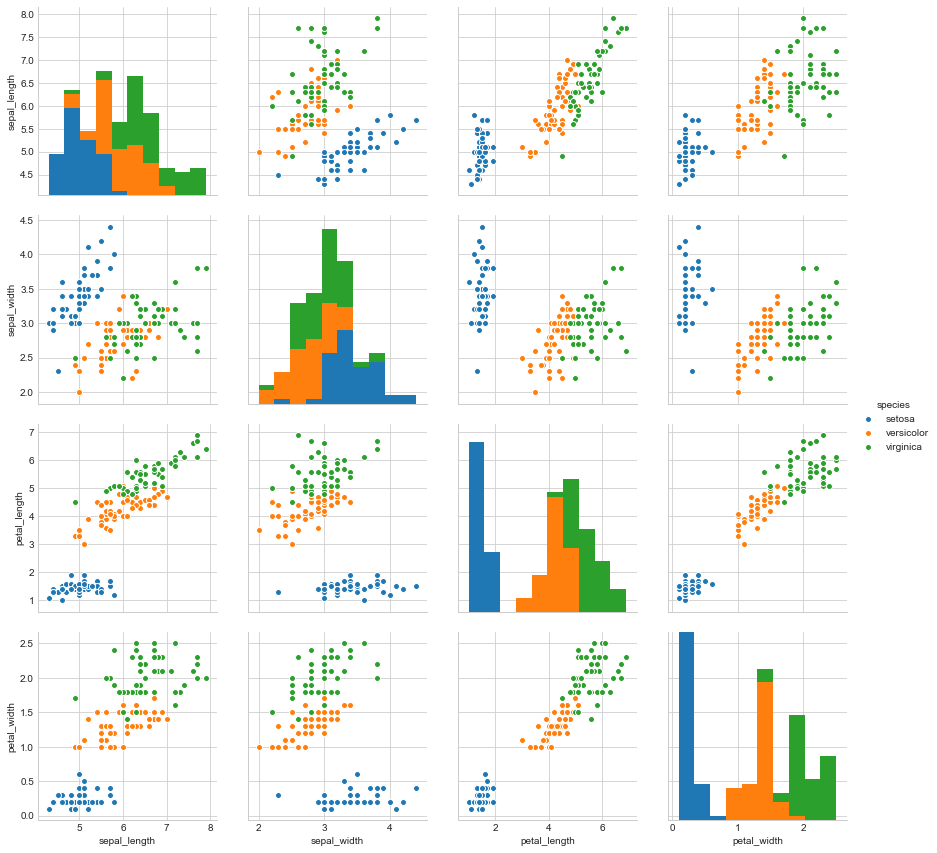

In [27]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue='species', size=3)
plt.show()

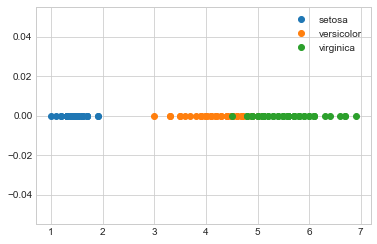

In [42]:
df_set = df[df['species']=='setosa']
df_vir = df[df['species']=='virginica']
df_ver = df[df['species']=='versicolor']

plt.plot(df_set['petal_length'],\
         np.zeros_like(df_set['petal_length']), 'o', label='setosa')
plt.plot(df_ver['petal_length'],\
        np.zeros_like(df_ver['petal_length']), 'o', label='versicolor')
plt.plot(df_vir['petal_length'],\
         np.zeros_like(df_vir['petal_length']), 'o', label='virginica')

plt.legend()

plt.show()

In [45]:
import warnings
warnings.filterwarnings('ignore')

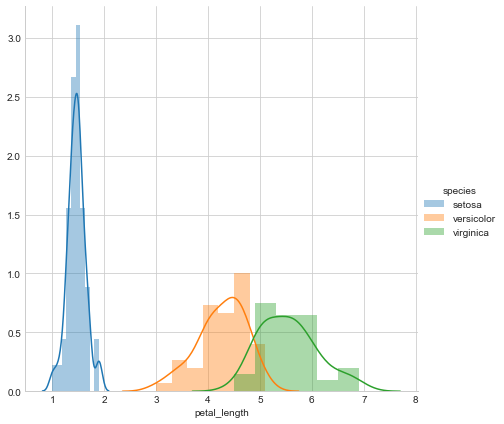

In [47]:
sns.FacetGrid(df, hue='species', size=6)\
.map(sns.distplot, 'petal_length')\
.add_legend()

plt.show()

In [71]:
c, b = np.histogram(df_set['petal_length'], bins=10)#,density=True)

pdf = c/sum(c)
print(c)
print(pdf)
print(b)
print('='*66)

c, b = np.histogram(df_set['petal_length'], bins=10,density=True)

pdf = c/sum(c)
print(c)
print(pdf)
print(b)
print('='*66)

print(np.array(np.diff(b)))

[ 1  1  2  7 12 14  7  4  0  2]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09]


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


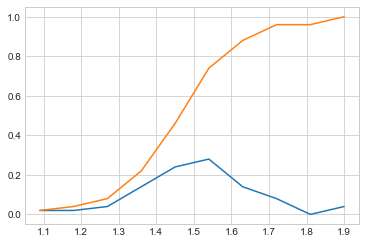

In [69]:
c, b = np.histogram(df_set['petal_length'], bins=10,density=True)

pdf = c/sum(c)
print(pdf)
print(b)

cdf  = np.cumsum(pdf)
plt.plot(b[1:], pdf)
plt.plot(b[1:], cdf)

plt.show()

*************************setosa*************************
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
*************************versicolor*************************
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
*************************virginica*************************
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


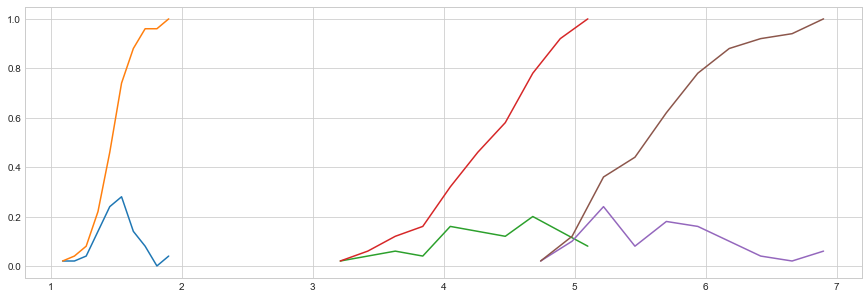

In [109]:
plt.figure(figsize=(15,5))
for idx,val in enumerate(df['species'].unique()):
#     plt.subplot(1,3,idx+1)
    c, b = np.histogram(df[df['species']==val]['petal_length'], bins=10,density=True)
    print('*'*25+val+'*'*25)
    pdf = c/sum(c)
    print(pdf)
    print(b)

    cdf  = np.cumsum(pdf)
    plt.plot(b[1:], pdf, label='pdf')
    plt.plot(b[1:], cdf, label='cdf')
#     plt.title(val)
#     plt.legend()

plt.show()

In [107]:
print('Mean:')
print(np.mean(df_set['petal_length']))
print(np.mean( np.append(df_set['petal_length'], 50) ))

print(np.mean(df_vir['petal_length']))
print(np.mean(df_ver['petal_length']))

Mean:
1.464
2.4156862745098038
5.552
4.26


In [108]:
print('Std-dev:')
print(np.std(df_set['petal_length']))
print(np.std(df_vir['petal_length']))
print(np.std(df_ver['petal_length']))

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [111]:
print('Median:')
print(np.median(df_set['petal_length']))
print(np.median( np.append(df_set['petal_length'], 50) ))

print(np.median(df_vir['petal_length']))
print(np.median(df_ver['petal_length']))

Median:
1.5
1.5
5.55
4.35


In [122]:
print('Quantile:')
print(np.percentile(df_set['petal_length'], np.arange(25,101,25) ))
print(np.percentile(df_vir['petal_length'], np.arange(25,101,25) ))
print(np.percentile(df_ver['petal_length'], np.arange(25,101,25) ))

Quantile:
[1.4   1.5   1.575 1.9  ]
[5.1   5.55  5.875 6.9  ]
[4.   4.35 4.6  5.1 ]


In [125]:
print('90th Percentile:')
print(np.percentile(df_set['petal_length'], 90 ))
print(np.percentile(df_vir['petal_length'], 90 ))
print(np.percentile(df_ver['petal_length'], 90 ))

90th Percentile:
1.7
6.3100000000000005
4.8


In [128]:
from statsmodels import robust
print('Meadin Absolute Deviation:')
print(robust.mad(df_set['petal_length'] ))
print(robust.mad(df_vir['petal_length'] ))
print(robust.mad(df_ver['petal_length'] ))

Meadin Absolute Deviation:
0.14826022185056031
0.6671709983275211
0.5189107764769602


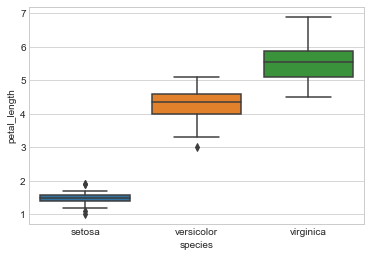

In [132]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()

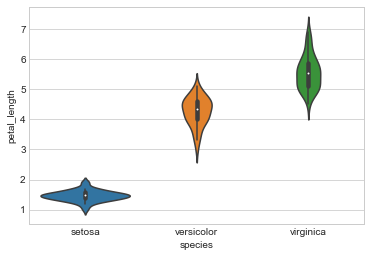

In [133]:
sns.violinplot(x='species', y='petal_length', data=df)
plt.show()

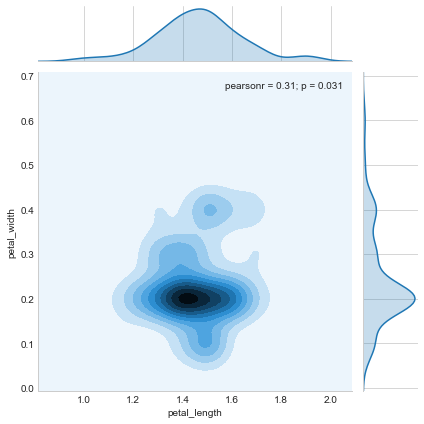

In [135]:
sns.jointplot(x='petal_length', y='petal_width', data=df_set, kind='kde')
plt.show()